In [1]:
import json

In [17]:
with open('distances_bicubic.json', 'r') as f:
    distances_bicubic = json.load(f)

with open('distances_bilinear_interpolation.json', 'r') as f:
    distances_bilinear_interpolation = json.load(f)

with open('distances_nearest.json', 'r') as f:
    distances_nearest = json.load(f)

with open('distances_SR.json', 'r') as f:
    distances_sr = json.load(f)
    
with open('fathers_day.json', 'r') as f:
    answers = json.load(f)

In [18]:
files_list = answers.keys()
files_count = len(distances_bicubic.keys()) * len(files_list)


In [19]:
def count_error(distances):
    error_counter = 0
    error_per_scale = {}
    for sub_res in distances.keys():
        error_per_scale[sub_res] = 0
        for file in files_list: 
            file_answers = distances[sub_res][file]
            file_answer = min([list(i.values())[0] for i in file_answers])
            file_answer = [list(i.keys())[0] for i in file_answers if list(i.values())[0] == file_answer]
            if answers[file] != file_answer[0]:
                error_counter += 1
                error_per_scale[sub_res] += 1
    return error_counter, error_per_scale

In [20]:
def get_accuracy(error_counter, error_per_scale):
    scale_accuracy = {}
    for scale_ in error_per_scale.keys():
        scale_accuracy[scale_] = 1. - error_per_scale[scale_] / len(files_list)
    mean_accuracy = 1. - error_counter / files_count
    return scale_accuracy, mean_accuracy

In [21]:
error_counter, error_per_scale = count_error(distances_bicubic)
cubic_scale_accuracy, cubic_mean_accuracy = get_accuracy(error_counter, error_per_scale)

In [22]:
error_counter, error_per_scale = count_error(distances_nearest)
nearest_scale_accuracy, nearest_mean_accuracy = get_accuracy(error_counter, error_per_scale)

In [23]:
error_counter, error_per_scale = count_error(distances_bilinear_interpolation)
bilinear_scale_accuracy, bilinear_mean_accuracy = get_accuracy(error_counter, error_per_scale)

In [24]:
error_counter, error_per_scale = count_error(distances_sr)
sr_scale_accuracy, sr_mean_accuracy = get_accuracy(error_counter, error_per_scale)

In [50]:
def get_accuracy_sorted_list(scale_accuracy, folder_name):
    ac_list = list(scale_accuracy.keys())
    ac_list = [int(i.split("/")[-1]) for i in ac_list]
    ac_list = sorted(ac_list)
    ac_list = [scale_accuracy[folder_name + str(i)] for i in ac_list ]
    return ac_list


In [25]:

cubic_scale_accuracy

{'./data/fathers_day_data/10': 0.33870967741935487,
 './data/fathers_day_data/100': 0.8064516129032258,
 './data/fathers_day_data/120': 0.8225806451612903,
 './data/fathers_day_data/15': 0.456989247311828,
 './data/fathers_day_data/150': 0.8118279569892473,
 './data/fathers_day_data/180': 0.8172043010752688,
 './data/fathers_day_data/20': 0.553763440860215,
 './data/fathers_day_data/200': 0.8225806451612903,
 './data/fathers_day_data/224': 0.8172043010752688,
 './data/fathers_day_data/30': 0.6236559139784946,
 './data/fathers_day_data/5': 0.4032258064516129,
 './data/fathers_day_data/50': 0.6881720430107527,
 './data/fathers_day_data/80': 0.7473118279569892}

In [26]:
nearest_scale_accuracy

{'./data/fathers_day_data/10': 0.048387096774193505,
 './data/fathers_day_data/100': 0.8494623655913979,
 './data/fathers_day_data/120': 0.8333333333333334,
 './data/fathers_day_data/15': 0.10215053763440862,
 './data/fathers_day_data/150': 0.8709677419354839,
 './data/fathers_day_data/180': 0.8225806451612903,
 './data/fathers_day_data/20': 0.3709677419354839,
 './data/fathers_day_data/200': 0.8494623655913979,
 './data/fathers_day_data/224': 0.8602150537634409,
 './data/fathers_day_data/30': 0.521505376344086,
 './data/fathers_day_data/5': 0.048387096774193505,
 './data/fathers_day_data/50': 0.6612903225806452,
 './data/fathers_day_data/80': 0.7473118279569892}

In [27]:
bilinear_scale_accuracy

{'./test_2/10': 0.4247311827956989,
 './test_2/100': 0.7526881720430108,
 './test_2/120': 0.7634408602150538,
 './test_2/15': 0.489247311827957,
 './test_2/150': 0.7956989247311828,
 './test_2/180': 0.7956989247311828,
 './test_2/20': 0.5268817204301075,
 './test_2/200': 0.8225806451612903,
 './test_2/224': 0.8118279569892473,
 './test_2/30': 0.586021505376344,
 './test_2/5': 0.33870967741935487,
 './test_2/50': 0.6666666666666667,
 './test_2/80': 0.7258064516129032}

In [48]:
sr_scale_accuracy

{'./SR/10': 0.15591397849462363,
 './SR/100': 0.5591397849462365,
 './SR/120': 0.6021505376344086,
 './SR/15': 0.18279569892473113,
 './SR/150': 0.5698924731182795,
 './SR/180': 0.5913978494623655,
 './SR/20': 0.28494623655913975,
 './SR/200': 0.6021505376344086,
 './SR/224': 0.5913978494623655,
 './SR/30': 0.3978494623655914,
 './SR/5': 0.20430107526881724,
 './SR/50': 0.5806451612903225,
 './SR/80': 0.532258064516129}

In [52]:
sr_list = get_accuracy_sorted_list(scale_accuracy=sr_scale_accuracy, folder_name="./SR/")
nearest_list = get_accuracy_sorted_list(scale_accuracy=nearest_scale_accuracy, folder_name="./data/fathers_day_data/")
linear_list = get_accuracy_sorted_list(scale_accuracy=bilinear_scale_accuracy, folder_name="./test_2/")
bicubic_list = get_accuracy_sorted_list(scale_accuracy=cubic_scale_accuracy, folder_name="./data/fathers_day_data/")

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

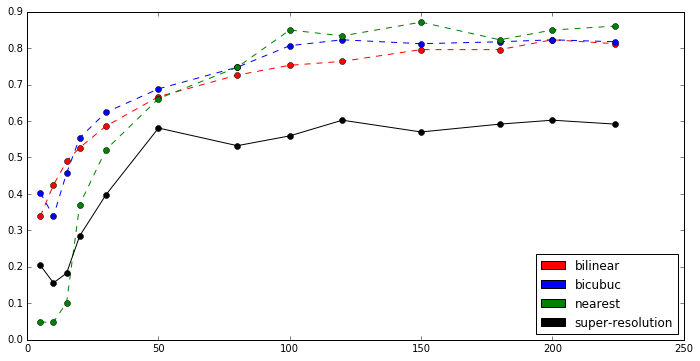

In [58]:
x1 = list(distances_bicubic.keys())
x1 = [float(i.split("/")[-1]) for i in x1]
x1 = sorted(x1)
x = np.arange(len(x1))

plt.figure(figsize=(3000/my_dpi, 1500/my_dpi), dpi=255)

plt.plot(x1, linear_list, 'r--', x1, bicubic_list, 'b--', x1, nearest_list, 'g--', x1, sr_list, 'k-')
plt.plot(x1, linear_list, 'ro', x1, bicubic_list, 'bo', x1, nearest_list, 'go', x1, sr_list, 'ko')

colours = ['r', 'b', 'g', 'k']
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc=colours[0])
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc=colours[1])
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc=colours[2])
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc=colours[3])

plt.legend((p1, p2, p3, p4), ('bilinear', 'bicubuc', 'nearest', 'super-resolution'), loc='best')
plt.show()

In [54]:
nearest_mean_accuracy

0.5835401157981803

In [55]:
bilinear_mean_accuracy

0.6538461538461539

In [56]:
cubic_mean_accuracy

0.6699751861042184

In [57]:
sr_mean_accuracy

0.45037220843672454